<a href="https://colab.research.google.com/github/RojTanakorn/Deep-Learning-Study/blob/master/3.%20Basic%20DL-Batch_Optimizers_LRDecay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf-nightly

In [1]:
!pip install tensorflow==2.1

     |████████████████████████████████| 421.8MB 17kB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 3.9MB 43.9MB/s 
     |████████████████████████████████| 450kB 57.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=580a854ac2b57aee844bc596deb9059b637d1155ca2123f02cbeef7772ed775d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

# **Homework 3**

### Load dataset and preprocessing

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

print(tf.__version__)

2.1.0


In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train, X_test = X_train/255., X_test/255.

11493376/11490434 [==============================] - 0s 0us/step


### Homework 3.1 vary batch size

In [5]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

In [6]:
wanted_loss = 1.47

##### Stochastic GD

In [7]:
sto_iteration_loss = list()
sto_iteration_acc = list()
max_training_time = 300
sto_start_time = None

class sto_callback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        global sto_start_time
        sto_start_time = time.time()
        sto_iteration_loss.clear()
        sto_iteration_acc.clear()
      
    def on_train_batch_end(self, batch, logs={}):
        sto_iteration_loss.append(logs.get('loss'))
        sto_iteration_acc.append(logs.get('accuracy'))
        if ((time.time() - sto_start_time) > max_training_time):
            print(f'\n\n=== Training time reach {max_training_time} s. Stop training. ===')
            self.model.stop_training = True

sto_callbacks = sto_callback()

In [8]:
Sto_GD_model = get_model()

h_Sto_GD_model = Sto_GD_model.fit(X_train, y_train, batch_size=1, epochs=5, callbacks=[sto_callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 141s 2ms/sample - loss: 1.5686 - accuracy: 0.8934
Epoch 2/5
60000/60000 [==============================] - 135s 2ms/sample - loss: 1.5354 - accuracy: 0.9257
Epoch 3/5
10912/60000 [====>.........................] - ETA: 1:49 - loss: 1.5337 - accuracy: 0.9271

=== Training time reach 300 s. Stop training. ===


(<matplotlib.axes._subplots.AxesSubplot at 0x7f4700085c18>,
 Text(0.5, 0, '# Iteration'),
 Text(0, 0.5, 'Accuracy'))

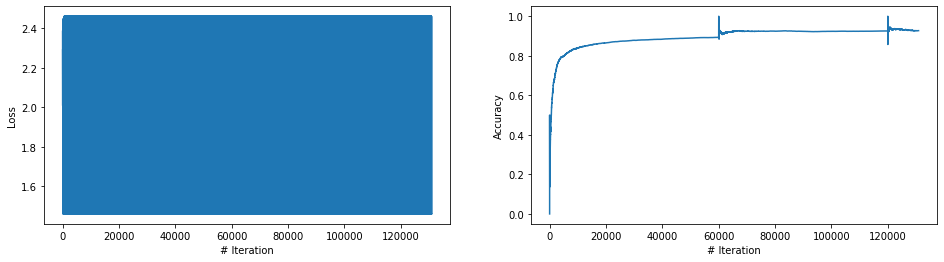

In [9]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1), plt.plot(sto_iteration_loss), plt.xlabel('# Iteration'), plt.ylabel('Loss')
plt.subplot(1,2,2), plt.plot(sto_iteration_acc), plt.xlabel('# Iteration'), plt.ylabel('Accuracy')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f46f60c7c88>,
 Text(0.5, 0, '# Iteration'),
 Text(0, 0.5, 'Accuracy'))

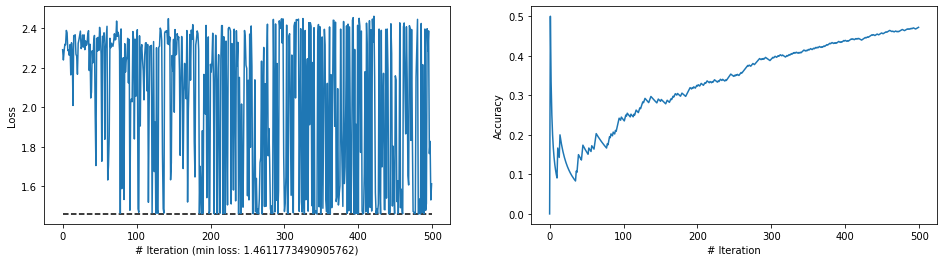

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1), plt.plot(sto_iteration_loss[:500]), plt.xlabel(f'# Iteration (min loss: {min(sto_iteration_loss[:500])})'), plt.ylabel('Loss')
plt.hlines(min(sto_iteration_loss[:500]), 0, 499, linestyles='dashed')
plt.subplot(1,2,2), plt.plot(sto_iteration_acc[:500]), plt.xlabel('# Iteration'), plt.ylabel('Accuracy')


##### Batch GD

In [20]:
iteration_loss = list()
iteration_acc = list()
start_time = None

class batch_callback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        global start_time
        start_time = time.time()
        iteration_loss.clear()
        iteration_acc.clear()
      
    def on_train_batch_end(self, batch, logs={}):
        iteration_loss.append(logs.get('loss'))
        iteration_acc.append(logs.get('accuracy'))
        if (logs.get('loss') < wanted_loss):
            print(f'time using: {format(time.time() - start_time, ".2f")} s.')
            self.model.stop_training = True


batch_callbacks = batch_callback()

In [21]:
Batch_GD_model = get_model()
Mini_Batch_64_GD_model = get_model()
Mini_Batch_128_GD_model = get_model()
Mini_Batch_256_GD_model = get_model()
Mini_Batch_512_GD_model = get_model()
Mini_Batch_1024_GD_model = get_model()

models_name = ['Batch Gradient Descent', '64 Mini-Batch Gradient Descent', '128 Mini-Batch Gradient Descent', 
               '256 Mini-Batch Gradient Descent', '512 Mini-Batch Gradient Descent', '1024 Mini-Batch Gradient Descent']

models = [Batch_GD_model, Mini_Batch_64_GD_model, Mini_Batch_128_GD_model, Mini_Batch_256_GD_model, Mini_Batch_512_GD_model, Mini_Batch_1024_GD_model]
batch_size = [X_train.shape[0], 64, 128, 256, 512, 1024]

iteration_loss_list = list()
iteration_acc_list = list()


In [22]:
for index in range(len(models)):
  print(f'\n\n\n========== Start training {models_name[index]} model ==========')

  models[index].fit(X_train, y_train, batch_size=batch_size[index], epochs=3000, verbose=0, callbacks=[batch_callbacks])
  
  print(f'# iteration: {len(iteration_loss)}')
  print(f'latest loss: {format(iteration_loss[-1], ".6f")}')

  iteration_loss_list.append(tuple(iteration_loss))
  iteration_acc_list.append(tuple(iteration_acc))

  print(f'========== End training model ==========')




========== Start training Batch Gradient Descent model ==========
time using: 345.61 s.
# iteration: 2146
latest loss: 1.469999
========== End training model ==========



========== Start training 64 Mini-Batch Gradient Descent model ==========
time using: 3.33 s.
# iteration: 1115
latest loss: 1.468636
========== End training model ==========



========== Start training 128 Mini-Batch Gradient Descent model ==========
time using: 4.52 s.
# iteration: 1333
latest loss: 1.467230
========== End training model ==========



========== Start training 256 Mini-Batch Gradient Descent model ==========
time using: 5.09 s.
# iteration: 1402
latest loss: 1.468665
========== End training model ==========



========== Start training 512 Mini-Batch Gradient Descent model ==========
time using: 7.12 s.
# iteration: 1652
latest loss: 1.464698
========== End training model ==========



========== Start training 1024 Mini-Batch Gradient Descent model ==========
time using: 8.04 s.
# iteration: 1

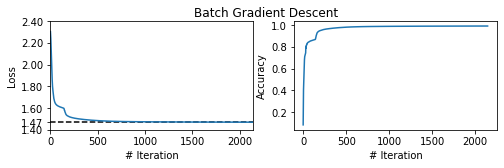

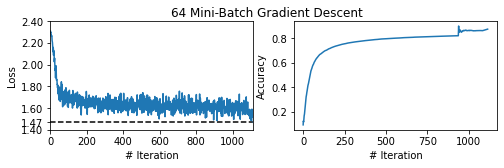

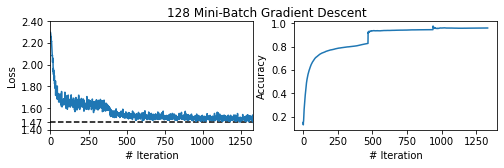

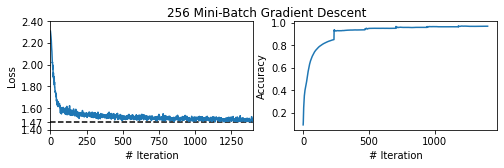

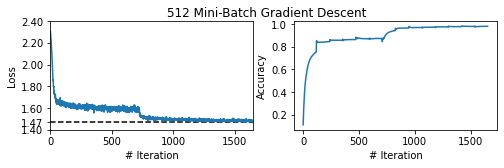

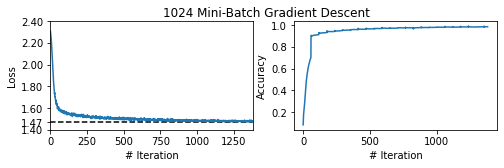

In [23]:
for index in range(len(models)):
    plt.figure(figsize=(8,2))
    plt.suptitle(models_name[index])
    plt.subplot(1,2,1), plt.plot(iteration_loss_list[index]) 
    plt.hlines(wanted_loss, 0, len(iteration_loss_list[index])-1, linestyles='dashed')
    plt.xlabel('# Iteration'), plt.ylabel('Loss')
    plt.xlim((0, len(iteration_loss_list[index])-1))
    plt.yticks(list(plt.yticks()[0]) + [wanted_loss])
    plt.subplot(1,2,2), plt.plot(iteration_acc_list[index]), plt.xlabel('# Iteration'), plt.ylabel('Accuracy')

### Homework 3.2 - 3.4 Optimizers

##### 3.2 Momentum Optimizer

In [24]:
def get_model_with_optimizer(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

In [25]:
momentum_model = get_model_with_optimizer(keras.optimizers.SGD(learning_rate=0.001, momentum=0.9))

h_momentum = momentum_model.fit(X_train, y_train, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 76us/sample - loss: 2.0921 - accuracy: 0.4309
Epoch 2/30
60000/60000 [==============================] - 4s 74us/sample - loss: 1.7627 - accuracy: 0.7291
Epoch 3/30
60000/60000 [==============================] - 4s 74us/sample - loss: 1.7180 - accuracy: 0.7551
Epoch 4/30
60000/60000 [==============================] - 4s 74us/sample - loss: 1.7053 - accuracy: 0.7627
Epoch 5/30
60000/60000 [==============================] - 4s 75us/sample - loss: 1.6404 - accuracy: 0.8358
Epoch 6/30
60000/60000 [==============================] - 4s 74us/sample - loss: 1.6244 - accuracy: 0.8464
Epoch 7/30
60000/60000 [==============================] - 4s 74us/sample - loss: 1.5777 - accuracy: 0.9013
Epoch 8/30
60000/60000 [==============================] - 5s 77us/sample - loss: 1.5556 - accuracy: 0.9184
Epoch 9/30
60000/60000 [==============================] - 4s 74us/sample - loss: 1.5467 - accuracy: 0.9254
Epoch 10/30
60

##### Homework 3.3 RMSProp Optimizer

In [26]:
rmsprop_model = get_model_with_optimizer(keras.optimizers.RMSprop(learning_rate=0.001))

h_rmsprop = rmsprop_model.fit(X_train, y_train, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 99us/sample - loss: 1.6303 - accuracy: 0.8335
Epoch 2/30
60000/60000 [==============================] - 5s 89us/sample - loss: 1.5183 - accuracy: 0.9437
Epoch 3/30
60000/60000 [==============================] - 5s 87us/sample - loss: 1.4990 - accuracy: 0.9621
Epoch 4/30
60000/60000 [==============================] - 5s 85us/sample - loss: 1.4929 - accuracy: 0.9686
Epoch 5/30
60000/60000 [==============================] - 5s 86us/sample - loss: 1.4895 - accuracy: 0.9717
Epoch 6/30
60000/60000 [==============================] - 5s 85us/sample - loss: 1.4876 - accuracy: 0.9736
Epoch 7/30
60000/60000 [==============================] - 5s 87us/sample - loss: 1.4851 - accuracy: 0.9759
Epoch 8/30
60000/60000 [==============================] - 5s 89us/sample - loss: 1.4844 - accuracy: 0.9768
Epoch 9/30
60000/60000 [==============================] - 5s 86us/sample - loss: 1.4822 - accuracy: 0.9789
Epoch 10/30
60

##### Homework 3.4 Adam Optimizer

In [27]:
adam_model = get_model_with_optimizer(keras.optimizers.Adam(learning_rate=0.001))

h_adam = adam_model.fit(X_train, y_train, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 78us/sample - loss: 1.6522 - accuracy: 0.8119
Epoch 2/30
60000/60000 [==============================] - 5s 80us/sample - loss: 1.5122 - accuracy: 0.9500
Epoch 3/30
60000/60000 [==============================] - 4s 75us/sample - loss: 1.5016 - accuracy: 0.9597
Epoch 4/30
60000/60000 [==============================] - 5s 75us/sample - loss: 1.4971 - accuracy: 0.9640
Epoch 5/30
60000/60000 [==============================] - 5s 76us/sample - loss: 1.4947 - accuracy: 0.9667
Epoch 6/30
60000/60000 [==============================] - 4s 73us/sample - loss: 1.4937 - accuracy: 0.9672
Epoch 7/30
60000/60000 [==============================] - 4s 74us/sample - loss: 1.4916 - accuracy: 0.9696
Epoch 8/30
60000/60000 [==============================] - 4s 75us/sample - loss: 1.4914 - accuracy: 0.9695
Epoch 9/30
60000/60000 [==============================] - 5s 76us/sample - loss: 1.4906 - accuracy: 0.9703
Epoch 10/30
60

##### Compare results

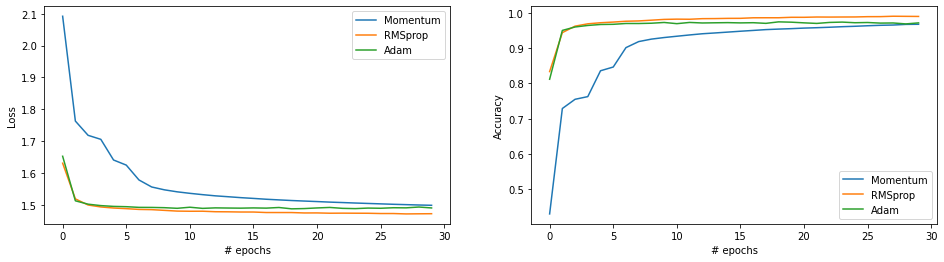

In [28]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1), plt.xlabel('# epochs'), plt.ylabel('Loss')
plt.plot(h_momentum.history['loss'], label='Momentum')
plt.plot(h_rmsprop.history['loss'], label='RMSprop')
plt.plot(h_adam.history['loss'], label='Adam')
plt.legend(loc='upper right')

plt.subplot(1,2,2), plt.xlabel('# epochs'), plt.ylabel('Accuracy')
plt.plot(h_momentum.history['accuracy'], label='Momentum')
plt.plot(h_rmsprop.history['accuracy'], label='RMSprop')
plt.plot(h_adam.history['accuracy'], label='Adam')
plt.legend(loc='lower right')

### Homework 3.5 Learning Rate Decay

LR Decay 1: $ lr = \frac{lr_{0}}{1+(decay\ rate*epoch)} $<br>
LR Decay 2: $ lr = lr_{0} * decay\ rate^{epoch} $<br>
LR Decay 3: $ lr = lr_{0} * (\frac{k}{\sqrt{epoch+1}}) $

In [29]:
initial_lr = 0.001
decay_rate = 0.95
k = 1

In [30]:
def lr_scheduler_1(epoch, lr):
  return initial_lr / (1+(decay_rate*epoch))

In [31]:
def lr_scheduler_2(epoch, lr):
  return initial_lr * (decay_rate**epoch)

In [32]:
def lr_scheduler_3(epoch, lr):
  return initial_lr * (k / np.sqrt(epoch+1))

In [33]:
def get_model_with_same_initial_weight():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(seed=0)),
        keras.layers.Dense(64, activation='relu', kernel_initializer=keras.initializers.GlorotUniform(seed=0)),
        keras.layers.Dense(10, activation='softmax', kernel_initializer=keras.initializers.GlorotUniform(seed=0))
    ])

    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

In [34]:
lr_decay_model_1 = get_model_with_same_initial_weight()
lr_decay_model_2 = get_model_with_same_initial_weight()
lr_decay_model_3 = get_model_with_same_initial_weight()

lr_decay_models_name = ['lr_decay_model_1', 'lr_decay_model_2', 'lr_decay_model_3']
lr_decay_models = [lr_decay_model_1, lr_decay_model_2, lr_decay_model_3]
lr_schedulers = [lr_scheduler_1, lr_scheduler_2, lr_scheduler_3]

lr_decay_histories = list()

epoch = 10

In [35]:
for index in range(len(lr_decay_models)):
    cb = keras.callbacks.LearningRateScheduler(lr_schedulers[index], verbose=1)
    print(f'\n\n\n========== Start training {lr_decay_models_name[index]} model ==========')

    h_lr_decay = lr_decay_models[index].fit(X_train, y_train, epochs=epoch, callbacks=[cb], shuffle=False)
    lr_decay_histories.append(h_lr_decay)

    print('========== End training model ==========')




========== Start training lr_decay_model_1 model ==========
Train on 60000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.5652 - accuracy: 0.9072

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005128205128205128.
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 1.5089 - accuracy: 0.9546

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0003448275862068966.
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.4980 - accuracy: 0.9656

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0002597402597402598.
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 1.4925 - accuracy: 0.9709

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00020833333333333335.
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - l

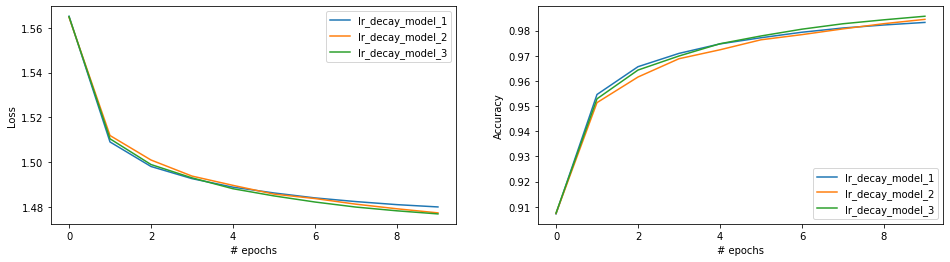

In [36]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
for index in range(len(lr_decay_histories)):
    plt.plot(lr_decay_histories[index].history['loss'], label=lr_decay_models_name[index])
plt.xlabel('# epochs'), plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
for index in range(len(lr_decay_histories)):
    plt.plot(lr_decay_histories[index].history['accuracy'], label=lr_decay_models_name[index])
plt.xlabel('# epochs'), plt.ylabel('Accuracy')
plt.legend(loc='lower right')